In [2]:
from helpers import * 
from canonical_order_kant import *
from simple_four_con import graph_data
from rel import * 
from boundary_cycle import *

In [3]:
co = KantCanonicalOrder(copy.deepcopy(graph_data))
re = RegularEdgeLabeling(co.data)
re.run()

ic| f"vn in loop {self.vn}": 'vn in loop 1'


In [4]:
show_graph_attributes(co.G)

("Node 0: {'data': NodeCanonicalOrder({'index': 0, 'order': 1, 'mark': False, "
 "'visited': 3, 'chords': 0})}")
("Node 1: {'data': NodeCanonicalOrder({'index': 1, 'order': 5, 'mark': True, "
 "'visited': 2, 'chords': 0})}")
("Node 2: {'data': NodeCanonicalOrder({'index': 2, 'order': 4, 'mark': True, "
 "'visited': 2, 'chords': 0})}")
("Node 3: {'data': NodeCanonicalOrder({'index': 3, 'order': 3, 'mark': True, "
 "'visited': 3, 'chords': 0})}")
("Node 4: {'data': NodeCanonicalOrder({'index': 4, 'order': 6, 'mark': True, "
 "'visited': 2, 'chords': 0})}")
("Node 5: {'data': NodeCanonicalOrder({'index': 5, 'order': 2, 'mark': True, "
 "'visited': 4, 'chords': 0})}")
("Node 6: {'data': NodeCanonicalOrder({'index': 6, 'order': 0, 'mark': False, "
 "'visited': 3, 'chords': 0})}")
("Node 7: {'data': NodeCanonicalOrder({'index': 7, 'order': 7, 'mark': True, "
 "'visited': 2, 'chords': 0})}")


In [22]:
def split_graph_by_ordered(k):
    ordered_nodes = []
    remaining_nodes = []
    for node_index in co.G.nodes:
        if co.get_node_data(node_index).order < k:
            ordered_nodes.append(node_index)
        elif co.get_node_data(node_index).order > k:
            remaining_nodes.append(node_index)
    
    curr_node = list(set.difference(set(co.G.nodes), set(remaining_nodes+ordered_nodes)))

    assert len(curr_node) == 1, "more than one current node :/"

    curr_node = curr_node[0]
    curr_edges = [e for e in list(co.G.edges) if curr_node in e]

    G_remain = nx.subgraph(co.G, remaining_nodes)
    G_ordered = nx.subgraph(co.G, ordered_nodes)
    # G_curr = nx.subgraph(co.G, list(curr_node))

    return G_remain, G_ordered, curr_node, curr_edges

In [23]:
G_remain, G_ordered, curr_node, curr_edges = split_graph_by_ordered(2)

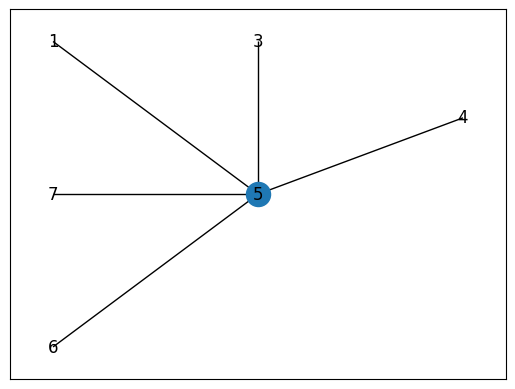

In [24]:
nx.draw_networkx(co.G, co.embed, nodelist=[curr_node], edgelist=curr_edges)

In [26]:
def get_ax(ix, n_rows, n_cols):
    assert n_rows == 2
    # todo adjust for more rows
    row, col = 0,0
    if ix > (n_cols-1):
        row = 1
    col = ix%n_cols
    return row, col


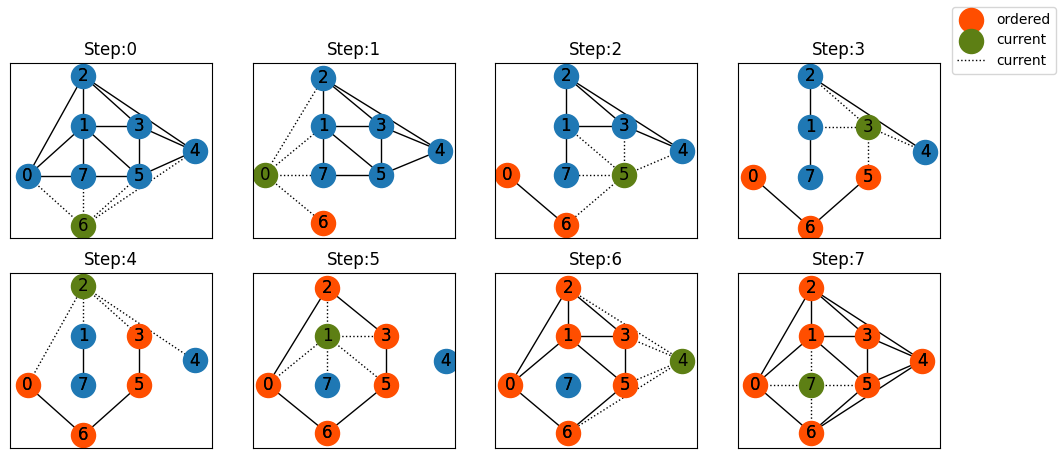

In [30]:
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows, ncols, figsize=[12,5])
for ix, k in enumerate(range(len(co.G.nodes))):
    G_remain, G_ordered, curr_node, curr_edges = split_graph_by_ordered(k)
    
    row, col = get_ax(ix, nrows, ncols)
    ax = axs[row, col]
    nx.draw_networkx(G_remain, co.embed, ax=ax)
    nx.draw_networkx(G_ordered, co.embed, ax=ax, node_color="#ff4e00", label="ordered")

    nx.draw_networkx(co.G, co.embed, nodelist=[curr_node], edgelist=curr_edges, node_color="#5d7f14", ax=ax, style=":", label="current")

    # nx.draw_networkx(G_curr, co.embed, ax=ax, node_color="#5d7f14", label="current")
    # current_node = list(G_curr.nodes)[0]
    # G_curr_edges = nx.subgraph_view(co.G, filter_edge=filter_edges).edges
    # nx.draw_networkx_edges(G_curr_edges._graph, co.embed, ax=ax, style=":")
    ax.set_title(f"Step:{k}")

handles, labels = axs[0,1].get_legend_handles_labels()
fig.legend(handles, labels)

In [7]:
# # find boundary cyle of G_remain 
# b = BoundaryCycle(GraphData(G_remain, co.embed), CONVEX_APPROACH=True)
# b.ccw_boundary_cycle